<a href="https://www.kaggle.com/code/yomritoyj06/k-nearestneigbours?scriptVersionId=188505864" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv('/kaggle/input/breast-cancer-wisconsin-data/data.csv')

In [3]:
df.sample(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.086900,0.070170,...,23.41,158.80,1956.0,0.1238,0.18660,0.24160,0.18600,0.2750,0.08902,NaN
10,845636,M,16.02,23.24,102.70,797.8,0.08206,0.06669,0.032990,0.033230,...,33.88,123.80,1150.0,0.1181,0.15510,0.14590,0.09975,0.2948,0.08452,NaN
383,90251,B,12.39,17.48,80.64,462.9,0.10420,0.12970,0.058920,0.028800,...,23.13,95.23,600.5,0.1427,0.35930,0.32060,0.09804,0.2819,0.11180,NaN
19,8510426,B,13.54,14.36,87.46,566.3,0.09779,0.08129,0.066640,0.047810,...,19.26,99.70,711.2,0.1440,0.17730,0.23900,0.12880,0.2977,0.07259,NaN
334,897374,B,12.30,19.02,77.88,464.4,0.08313,0.04202,0.007756,0.008535,...,28.46,84.53,544.3,0.1222,0.09052,0.03619,0.03983,0.2554,0.07207,NaN


In [4]:
df.shape

(569, 33)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [7]:
df['diagnosis'].nunique()

2

In [8]:
from sklearn.preprocessing import OneHotEncoder

In [9]:
ohe = OneHotEncoder()

In [10]:
y = df['diagnosis']
X = df.iloc[:, 2:-1]

In [11]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   radius_mean              569 non-null    float64
 1   texture_mean             569 non-null    float64
 2   perimeter_mean           569 non-null    float64
 3   area_mean                569 non-null    float64
 4   smoothness_mean          569 non-null    float64
 5   compactness_mean         569 non-null    float64
 6   concavity_mean           569 non-null    float64
 7   concave points_mean      569 non-null    float64
 8   symmetry_mean            569 non-null    float64
 9   fractal_dimension_mean   569 non-null    float64
 10  radius_se                569 non-null    float64
 11  texture_se               569 non-null    float64
 12  perimeter_se             569 non-null    float64
 13  area_se                  569 non-null    float64
 14  smoothness_se            5

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
scaler = StandardScaler()

In [14]:
X = scaler.fit_transform(X)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [16]:
clf = KNeighborsClassifier()

In [17]:
clf.fit(X_train, y_train)

KNeighborsClassifier()

In [18]:
from sklearn.metrics import accuracy_score

In [19]:
print(accuracy_score(y_train, clf.predict(X_train)))
print(accuracy_score(y_test, clf.predict(X_test)))

0.9846153846153847
0.956140350877193


In [20]:
pca = PCA()

In [21]:
X_train_trans = pca.fit_transform(X_train)
X_test_trans = pca.transform(X_test)

In [22]:
pca.components_.shape  #gives the eigen vectors, 30 eigen vectors having 30 components in 30 axes

(30, 30)

In [23]:
pca.explained_variance_ratio_*100

array([4.58550116e+01, 1.75175919e+01, 9.57697679e+00, 6.70866226e+00,
       5.28052447e+00, 3.91784457e+00, 2.29125499e+00, 1.62253931e+00,
       1.33167647e+00, 1.16959472e+00, 9.57703426e-01, 8.24168349e-01,
       7.75676523e-01, 5.29618472e-01, 2.94511197e-01, 2.61030331e-01,
       2.09958522e-01, 1.74016167e-01, 1.59682797e-01, 1.03501480e-01,
       9.63682951e-02, 8.99506701e-02, 8.33896930e-02, 6.25826591e-02,
       5.18822194e-02, 2.44539699e-02, 2.16777097e-02, 5.47552164e-03,
       2.24934066e-03, 4.25511174e-04])

In [24]:
np.cumsum(pca.explained_variance_ratio_*100)

array([ 45.85501165,  63.37260358,  72.94958036,  79.65824263,
        84.9387671 ,  88.85661167,  91.14786665,  92.77040596,
        94.10208243,  95.27167715,  96.22938057,  97.05354892,
        97.82922544,  98.35884392,  98.65335511,  98.91438544,
        99.12434397,  99.29836013,  99.45804293,  99.56154441,
        99.65791271,  99.74786338,  99.83125307,  99.89383573,
        99.94571795,  99.97017192,  99.99184963,  99.99732515,
        99.99957449, 100.        ])

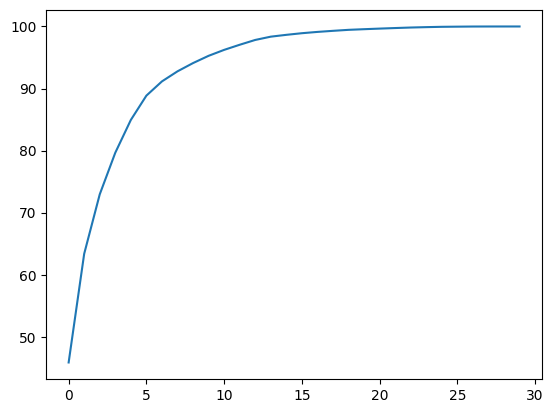

In [25]:
plt.plot(np.cumsum(pca.explained_variance_ratio_*100))

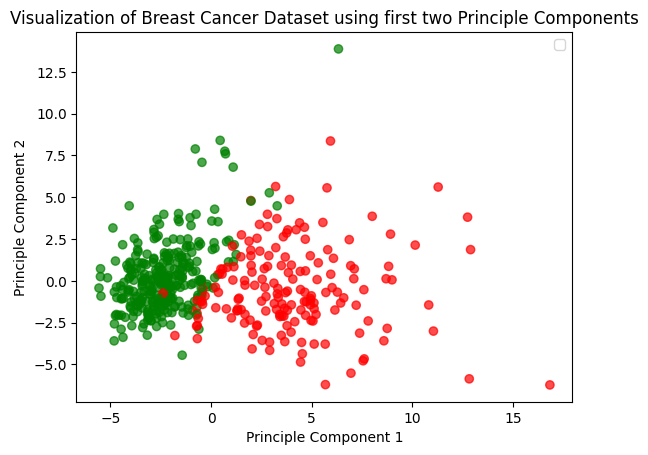

In [26]:
#Red color means malignant and green color means benign
colors = {'M': 'red', 'B': 'green'}
color_map = y_train.map(colors)
plt.scatter(X_train_trans[:, 0], X_train_trans[:, 1], c = color_map, alpha = 0.7)
plt.xlabel('Principle Component 1')
plt.ylabel('Principle Component 2')
plt.title('Visualization of Breast Cancer Dataset using first two Principle Components')
plt.legend()
plt.show()

In [27]:
from sklearn.preprocessing import LabelBinarizer

# Assuming your target column is named 'target'
label_binarizer = LabelBinarizer()
y_dum = label_binarizer.fit_transform(y_train)

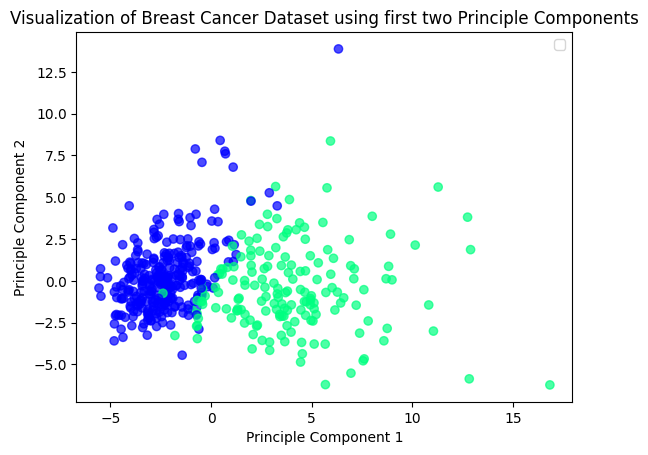

In [28]:
plt.scatter(X_train_trans[:, 0], X_train_trans[:, 1], c = y_dum, cmap = 'winter', alpha = 0.7)
plt.xlabel('Principle Component 1')
plt.ylabel('Principle Component 2')
plt.title('Visualization of Breast Cancer Dataset using first two Principle Components')
plt.legend()
plt.show()

In [29]:
clf1 = KNeighborsClassifier()

In [30]:
clf1.fit(X_train_trans, y_train)

KNeighborsClassifier()

In [31]:
print(accuracy_score(y_train, clf1.predict(X_train_trans))*100)
print(accuracy_score(y_test, clf1.predict(X_test_trans))*100)

98.46153846153847
95.6140350877193


In [32]:
X_train.shape

(455, 30)

## Cross validation for different values of k
### We will try values of k from 1 to sqrt(samples in train data, i.e. 455 which is approx 21)

In [33]:
ls = []

for i in range(1, 22):
    clf_i = KNeighborsClassifier(n_neighbors = i)
    clf_i.fit(X_train, y_train)
    ls.append((accuracy_score(y_train, clf_i.predict(X_train)), accuracy_score(y_test, clf_i.predict(X_test))))

In [34]:
maxi = -1
k = 0
ls_avg = []
for i in range(0, len(ls)):
    avg = (ls[i][0] + ls[i][1])/2
    ls_avg.append(avg)
    if avg > maxi:
        maxi = avg
        k = i+1

print(k, maxi)
print(ls_avg)

5 0.9703778677462889
[0.9692982456140351, 0.9572103335261231, 0.965991902834008, 0.9637941006362059, 0.9703778677462889, 0.9648833622517833, 0.9670811644495855, 0.9659822633506844, 0.9670811644495855, 0.9648833622517833, 0.9659822633506844, 0.9659822633506844, 0.9615962984384037, 0.9561017929438982, 0.96158665895508, 0.96158665895508, 0.9572006940427993, 0.9582899556583767, 0.9593888567572778, 0.953903990746096, 0.9604877578561789]


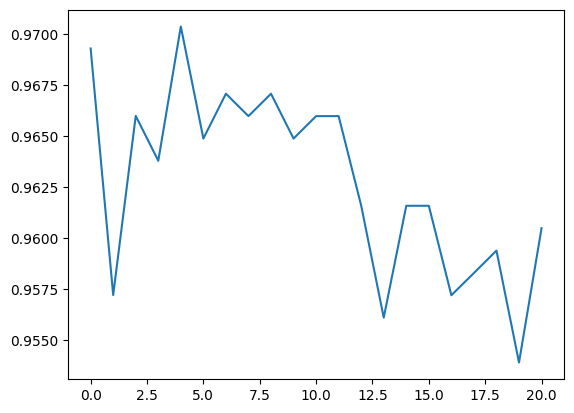

In [35]:
plt.plot(ls_avg)

[0.9385964912280702, 0.9385964912280702, 0.9473684210526315, 0.9473684210526315, 0.956140350877193, 0.956140350877193, 0.956140350877193, 0.956140350877193, 0.956140350877193, 0.956140350877193, 0.956140350877193, 0.956140350877193, 0.9473684210526315, 0.9473684210526315, 0.956140350877193, 0.956140350877193, 0.9473684210526315, 0.956140350877193, 0.956140350877193, 0.9473684210526315, 0.956140350877193]
[1.0, 0.9758241758241758, 0.9846153846153847, 0.9802197802197802, 0.9846153846153847, 0.9736263736263736, 0.978021978021978, 0.9758241758241758, 0.978021978021978, 0.9736263736263736, 0.9758241758241758, 0.9758241758241758, 0.9758241758241758, 0.9648351648351648, 0.967032967032967, 0.967032967032967, 0.967032967032967, 0.9604395604395605, 0.9626373626373627, 0.9604395604395605, 0.9648351648351648]


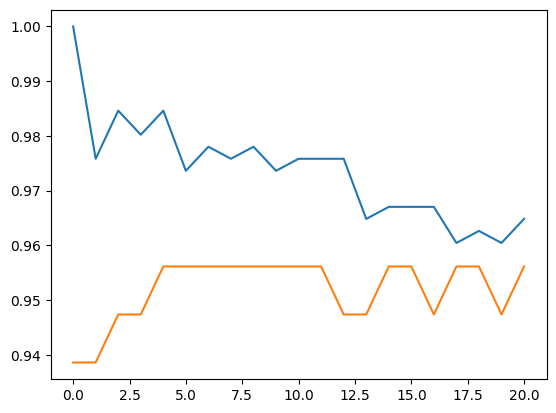

In [36]:
test_accuracies = list(map(lambda x: x[1], ls))
train_accuracies = list(map(lambda x: x[0], ls))
print(test_accuracies)
print(train_accuracies)
plt.plot(train_accuracies)
plt.plot(test_accuracies)

In [37]:
max(ls_avg)

0.9703778677462889

## We see that we get the k = 5 gives the best results